In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv('datasets/netflix_data.csv')
#netflix_df.head()
len(netflix_df[(netflix_df['country'] == 'United States') & (netflix_df['release_year'] == 2020)])
#pd.plot(x = netflix_df['Year'], y=netflix_df['duration'], type = scatter )

0

In [2]:
netflix_year_dur_df = netflix_df[['release_year', 'duration']]
netflix_year_dur_df.head()

,release_year,duration
0,2020,4
1,2016,93
2,2011,78
3,2009,80
4,2008,123


In [10]:
netflix_year_dur_group_df=netflix_year_dur_df.groupby(['release_year']).max()
netflix_year_dur_group_df = netflix_year_dur_group_df.reset_index()

In [11]:
netflix_year_dur_group_df.head()
netflix_year_dur_group_df.plot(x = "release_year", y = "duration", kind = 'bar', grid = True, figsize=(20, 5))

plt.show()

TypeError: no numeric data to plot

Show total shows/movies release in each year since 1993

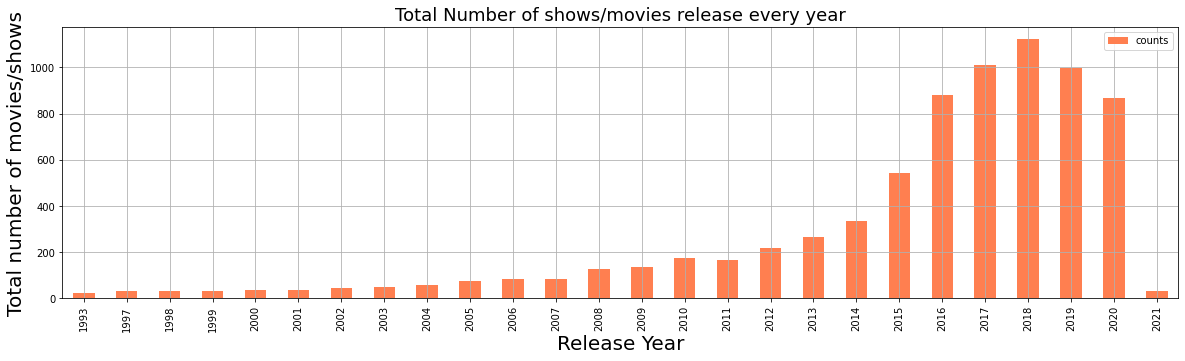

In [7]:
netflix_release_yr_df =netflix_df[['release_year']].value_counts().reset_index().sort_values('release_year', ascending = True)
netflix_release_yr_df.columns = ['release_year', 'counts']
netflix_release_yr_df = netflix_release_yr_df[netflix_release_yr_df['counts'] > 20]
netflix_release_yr_df.head()
ax = netflix_release_yr_df.plot(x = "release_year", y = "counts", kind = 'bar', grid = True, \
                                figsize=(20, 5), color = 'coral', fontsize = 10)

ax.set_alpha(0.8)
ax.set_title("Total Number of shows/movies release every year", fontsize=18)
ax.set_xlabel("Release Year", fontsize=20);
ax.set_ylabel("Total number of movies/shows", fontsize=20);
# create a list to collect the plt.patches data


plt.show()


Bar stacked plot to display number of shows/movies release per year since 2003 in each country

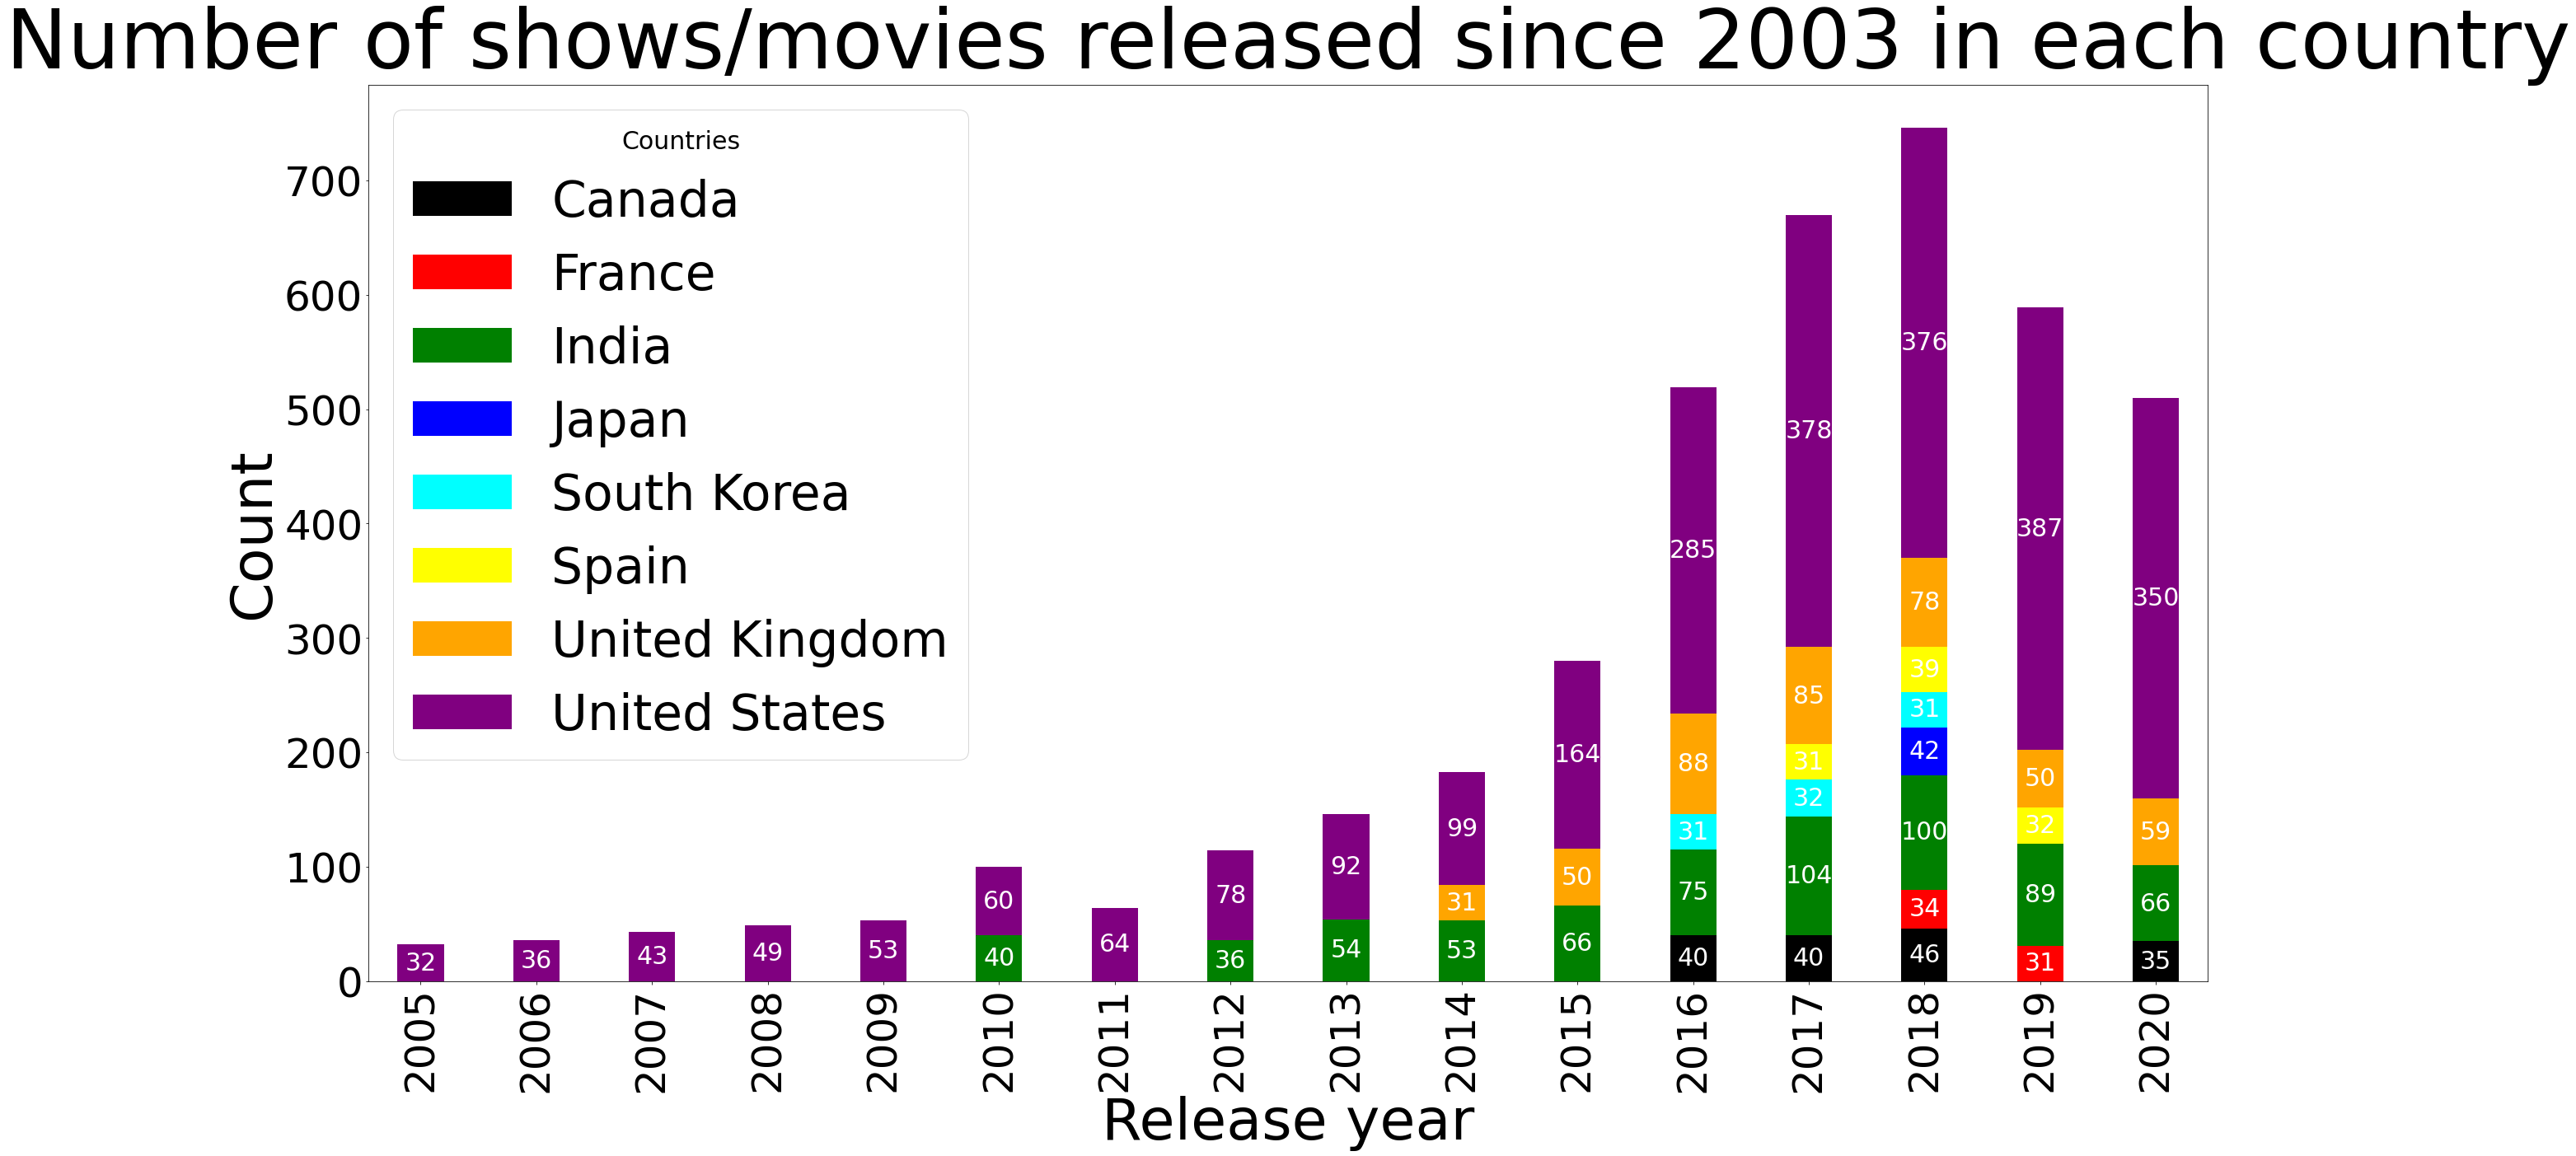

In [12]:
netflix_release_yr_country_df = netflix_df.groupby(['release_year', 'country']).size().reset_index().sort_values('release_year', ascending = True)
netflix_release_yr_country_df.columns = ['release_year', 'country','counts']
netflix_release_yr_country_df = netflix_release_yr_country_df[netflix_release_yr_country_df['counts'] > 30]
ax = netflix_release_yr_country_df.groupby(['release_year','country']).sum().unstack().plot(kind='bar',y='counts', stacked=True, figsize=(40,20), fontsize = 50, width = 0.4, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple'])
#netflix_release_yr_country_df.head(20)
plt.legend(title="Countries", fontsize=60, title_fontsize=30)
plt.title("Number of shows/movies released since 2003 in each country", fontsize = 100)
plt.xlabel("Release year", fontsize = 70)
plt.ylabel("Count", fontsize = 70)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels,label_type='center', fontsize = 30, color = 'white')
    
    

#ax = netflix_release_yr_country_df.plot(x='release_year', y= 'counts',stacked=False, kind='bar', figsize=(100,50), fontsize = 50)
plt.show()



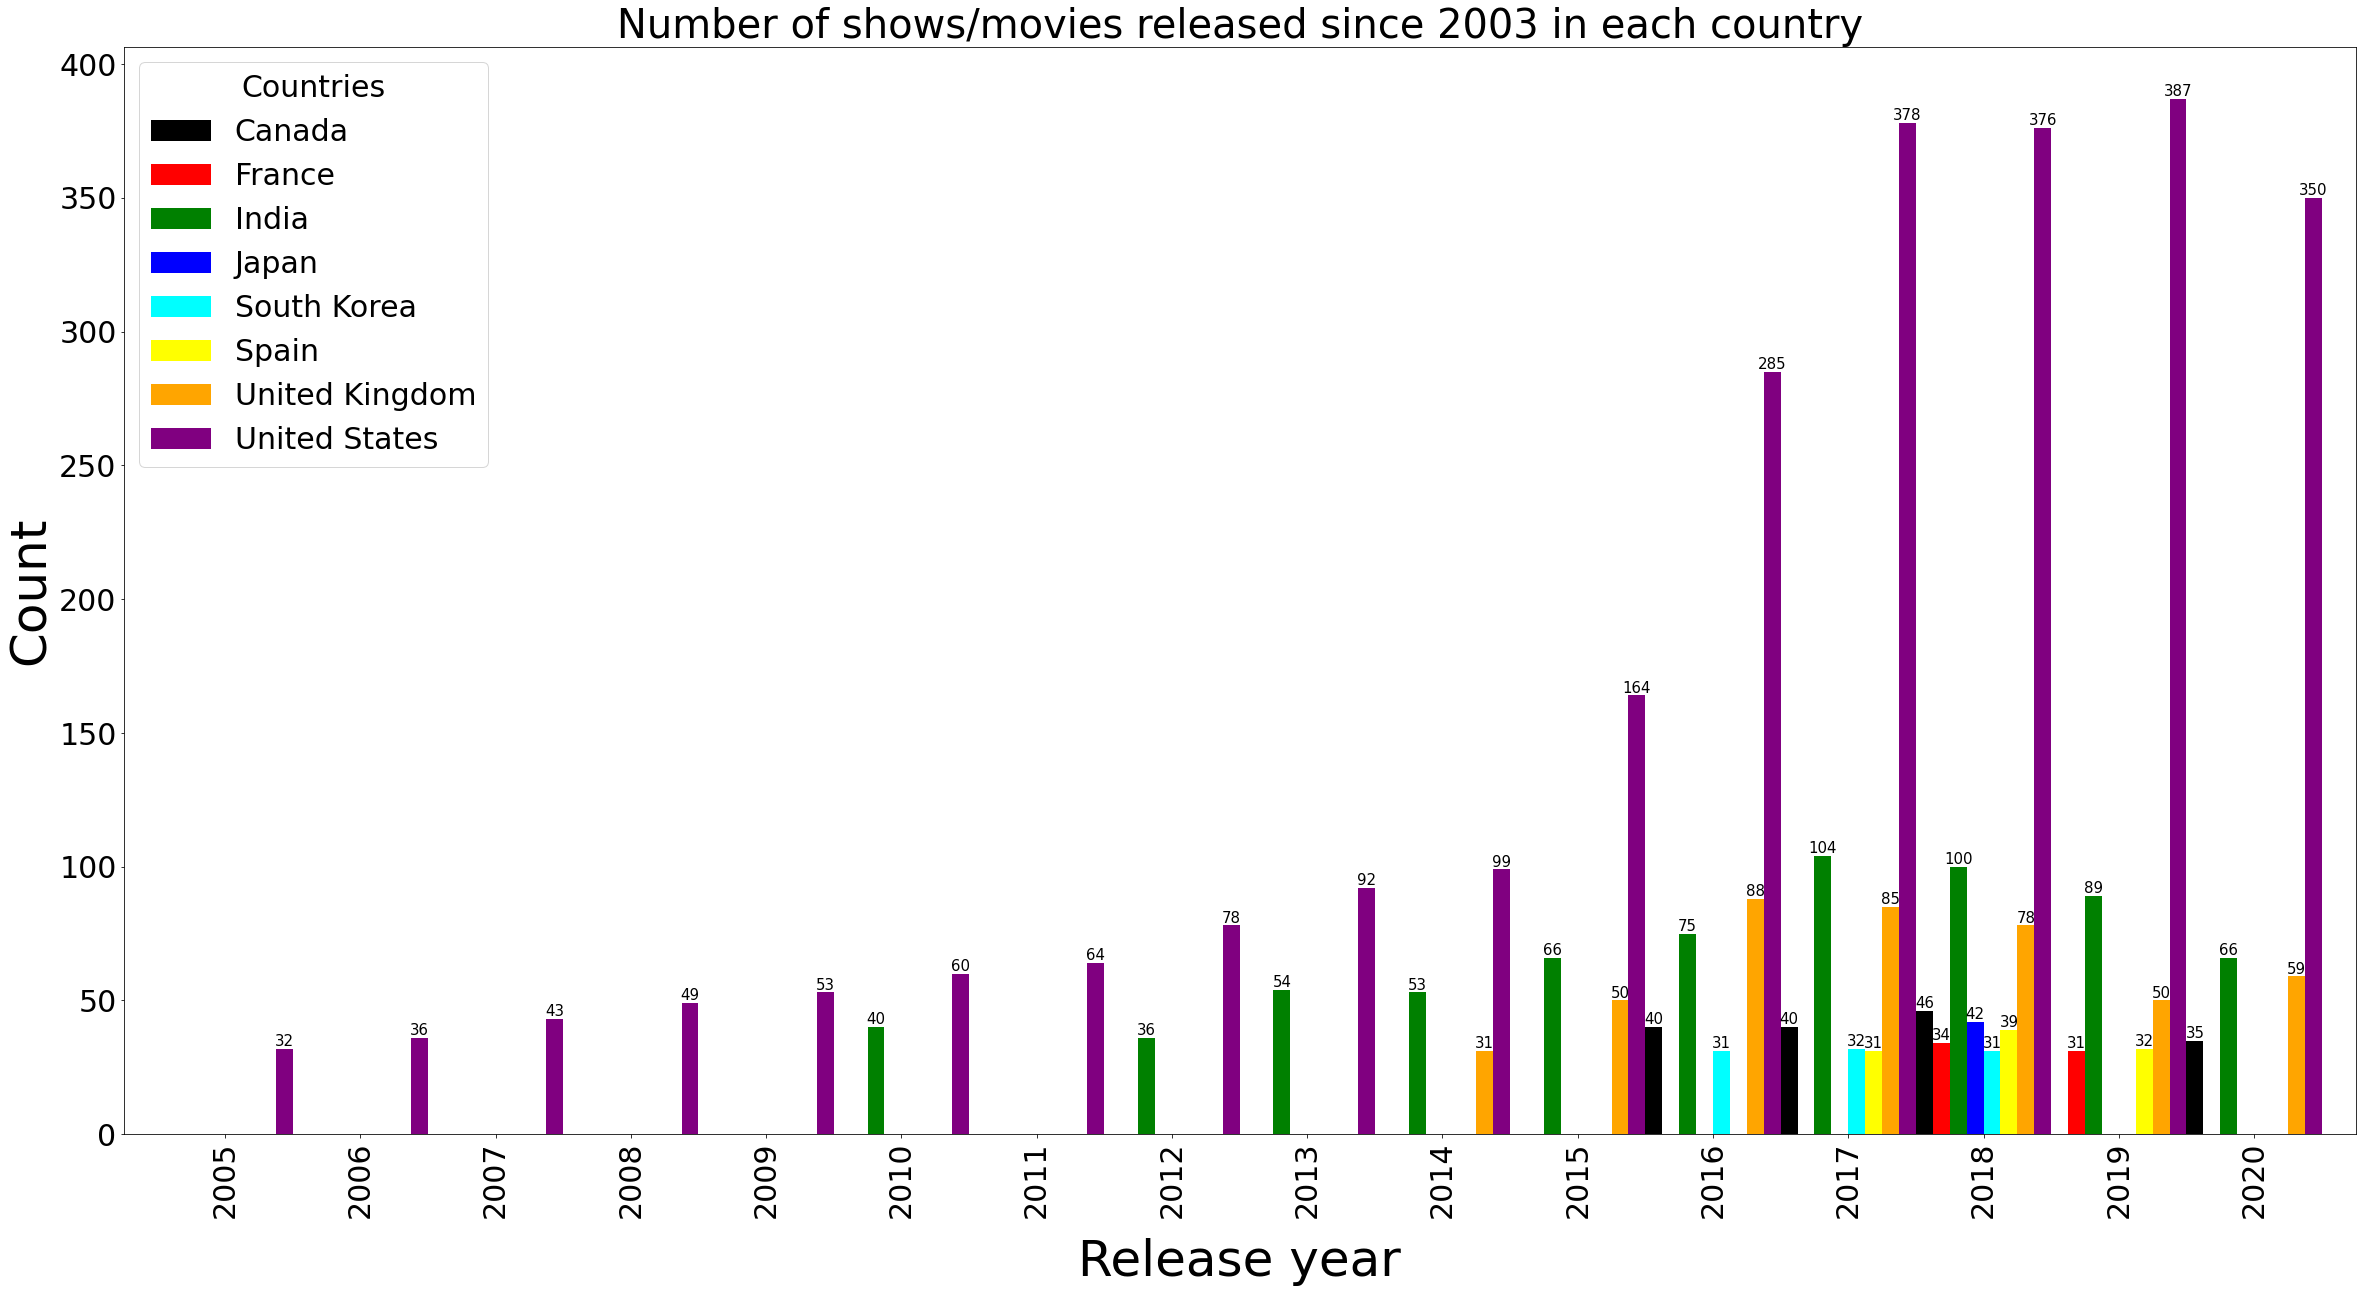

In [13]:
from itertools import cycle, islice

ax = netflix_release_yr_country_df.groupby(['release_year','country']).sum().unstack().plot(kind='bar',y='counts', \
                                            stacked=False, figsize=(40,20), fontsize = 30, width = 1.0, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple'])
#netflix_release_yr_country_df.head(20)
plt.legend(title="Countries", fontsize=30, title_fontsize=30)
plt.title("Number of shows/movies released since 2003 in each country", fontsize = 40)
plt.xlabel("Release year", fontsize = 50, labelpad=20)
plt.ylabel("Count", fontsize = 50)

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels,label_type='edge', fontsize = 15)
    
    

#ax = netflix_release_yr_country_df.plot(x='release_year', y= 'counts',stacked=False, kind='bar', figsize=(100,50), fontsize = 50)
plt.show()

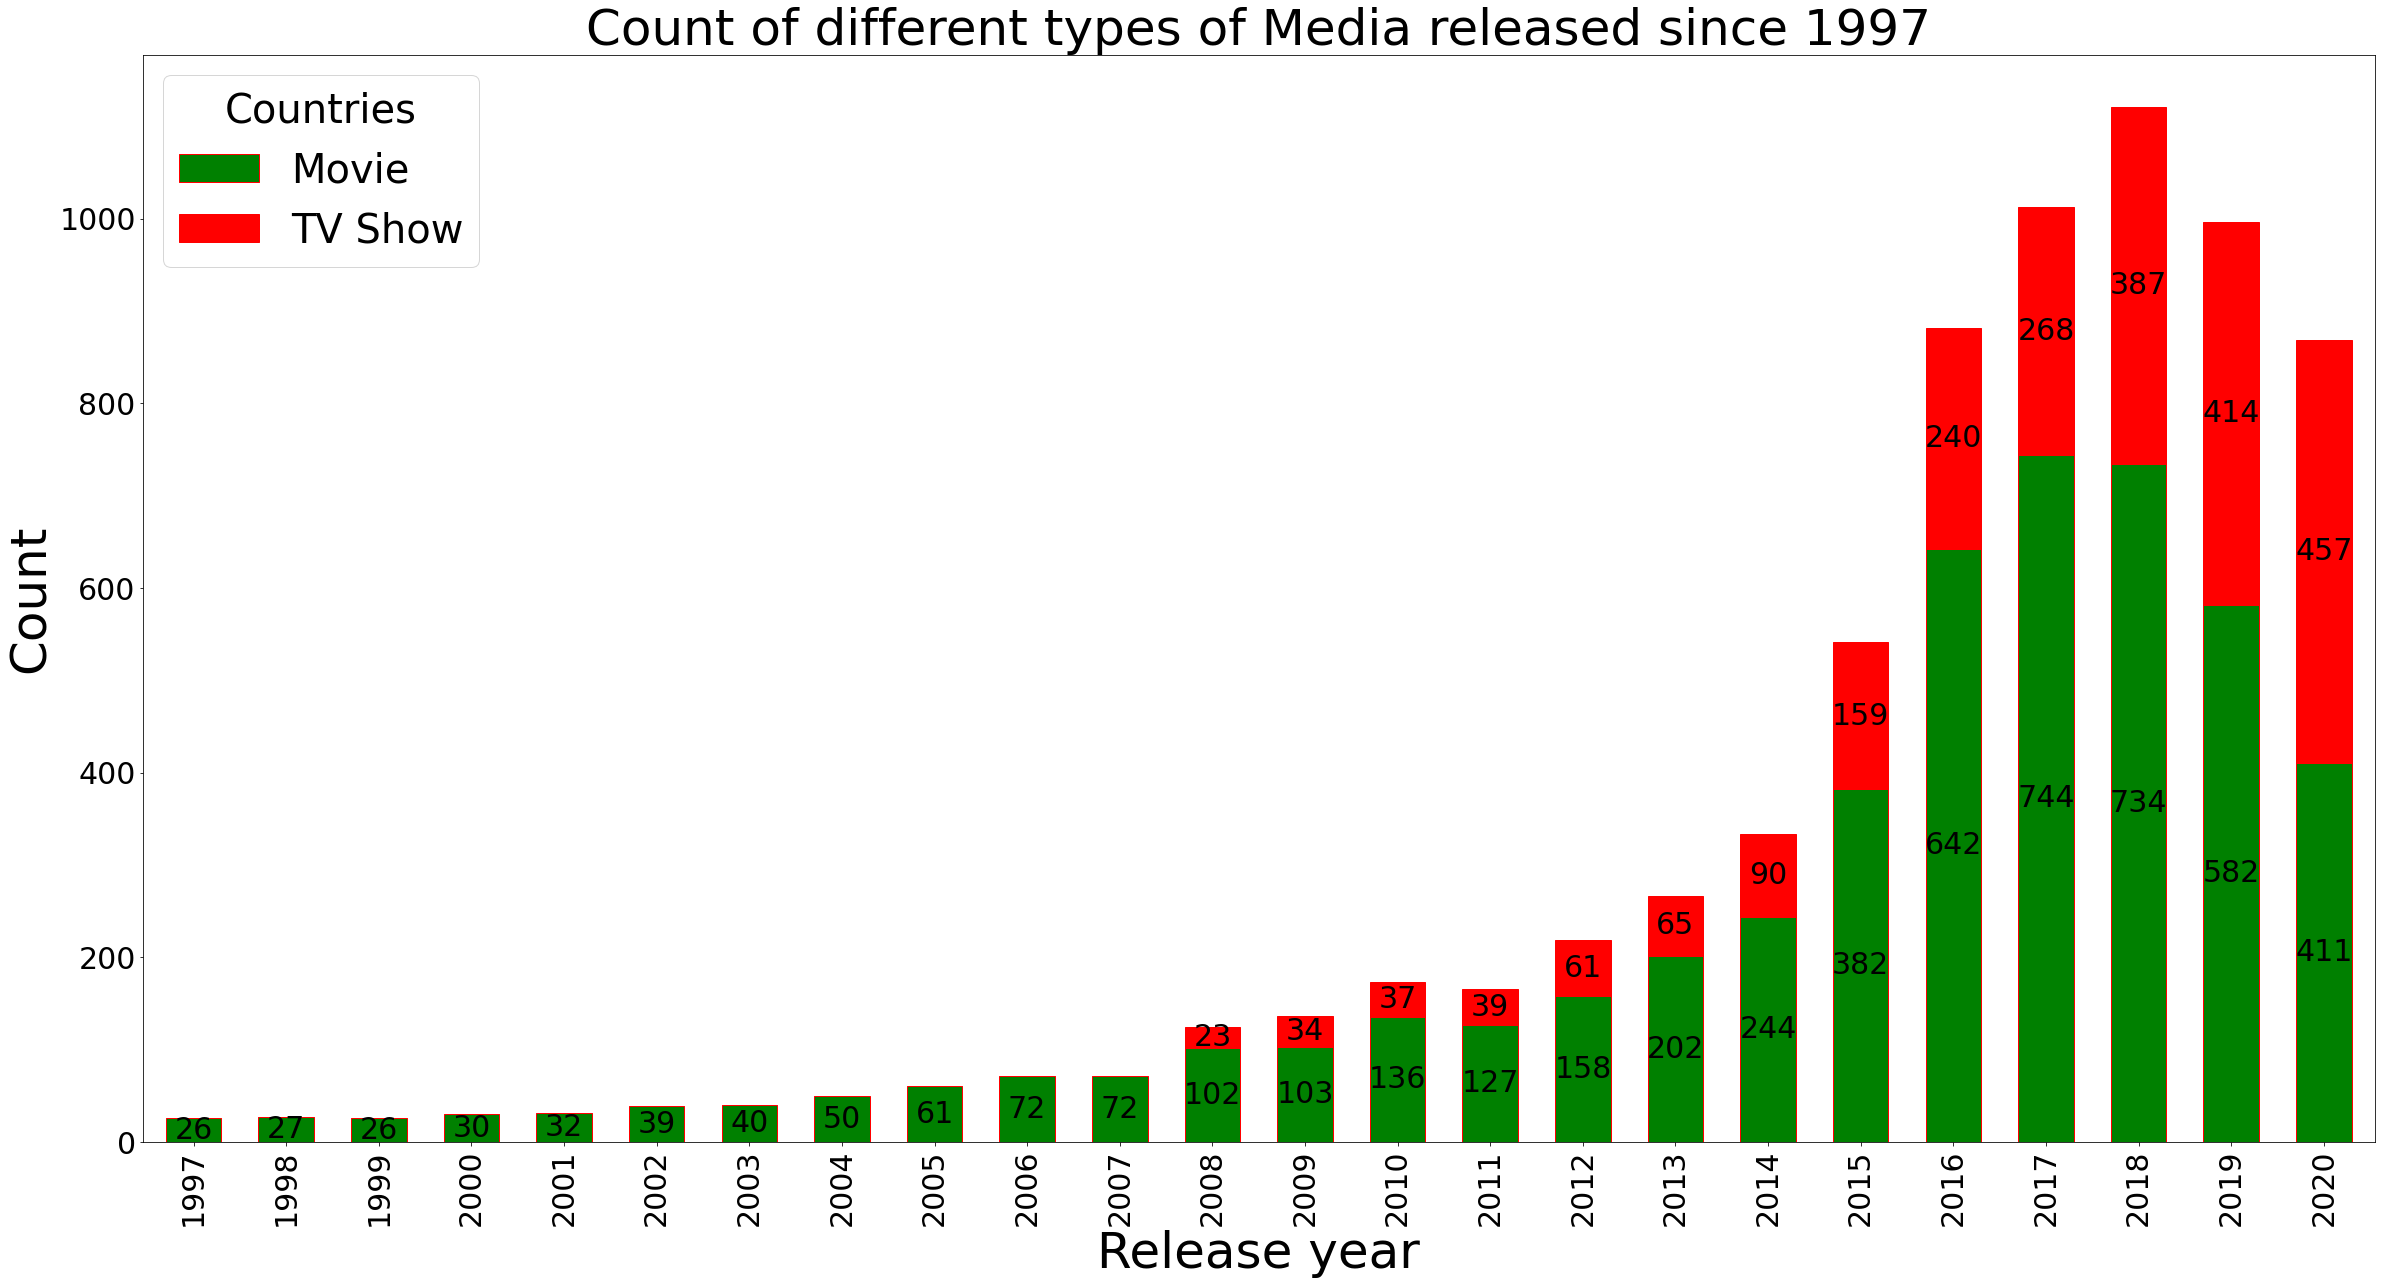

In [14]:
netflix_release_yr_type_df = netflix_df.groupby(['release_year', 'type']).size().reset_index().sort_values('release_year', ascending = True)

netflix_release_yr_type_df.columns = ['release_year', 'type','counts']
netflix_release_yr_type_df = netflix_release_yr_type_df[netflix_release_yr_type_df['counts'] > 20]

ax = netflix_release_yr_type_df.groupby(['release_year','type']).sum().unstack().plot(kind='bar',y='counts', stacked=True, figsize=(40,20), fontsize = 30, width = 0.6, color=['green', 'red', 'blue', 'cyan', 'yellow', 'orange', 'purple'], edgecolor="red")
#netflix_release_yr_country_df.head(20)
plt.legend(title="Countries", fontsize=40, title_fontsize=40)
plt.title("Count of different types of Media released since 1997", fontsize = 50)
plt.xlabel("Release year", fontsize = 50)
plt.ylabel("Count", fontsize = 50)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels,label_type='center', fontsize = 30, color = 'black')
    
    

#ax = netflix_release_yr_country_df.plot(x='release_year', y= 'counts',stacked=False, kind='bar', figsize=(100,50), fontsize = 50)
#plt.show()
plt.savefig('New_graph', transparent = False, facecolor ="w")
#netflix_release_yr_type_df.head()

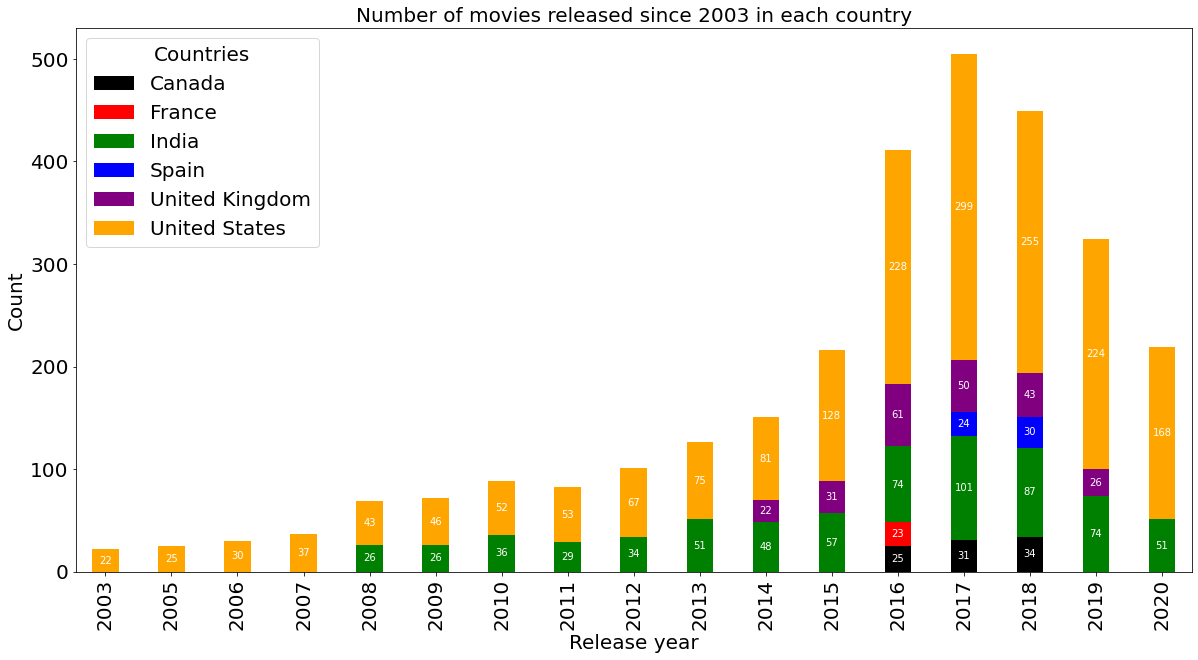

In [17]:
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie']
netflix_movies_df.head()
netflix_movie_yr_country_df = netflix_movies_df.groupby(['release_year', 'country']).size().reset_index().sort_values('release_year', ascending = True)
netflix_movie_yr_country_df.columns = ['release_year', 'country','counts']
netflix_movie_yr_country_df = netflix_movie_yr_country_df[netflix_movie_yr_country_df['counts'] > 20]
ax = netflix_movie_yr_country_df.groupby(['release_year','country']).sum().unstack().plot(kind='bar',y='counts', \
                                        stacked=True, figsize=(20,10), fontsize = 20, width = 0.4, \
                                        color=['black', 'red', 'green', 'blue', 'purple', 'orange', 'orange', 'purple'])
#netflix_release_yr_country_df.head(20)
plt.legend(title="Countries", fontsize=20, title_fontsize=20)
plt.title("Number of movies released since 2003 in each country", fontsize = 20)
plt.xlabel("Release year", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels,label_type='center', fontsize = 10, color = 'white')
    
    

#ax = netflix_release_yr_country_df.plot(x='release_year', y= 'counts',stacked=False, kind='bar', figsize=(100,50), fontsize = 50)
plt.show()
#plt.savefig('test.png', bbox_inches='tight')


In [15]:
netflix_release_yr_country_df[netflix_release_yr_country_df['release_year'] == 2020]

,release_year,country,counts


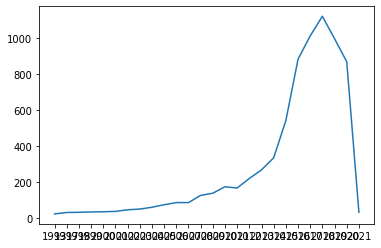

In [16]:
plt.plot(netflix_release_yr_df['release_year'], netflix_release_yr_df['counts'])
plt.show()